In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
import random
from collections import Counter

In [28]:
df = pd.read_csv('data.csv', on_bad_lines='skip')
df.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [29]:
print(f'Length of the Dataset: {len(df)}')

Length of the Dataset: 669640


In [30]:
df = df.dropna()

In [31]:
print(f'Length of the Dataset: {len(df)}')

Length of the Dataset: 669639


In [32]:
df.describe()

,strength
count,669639.000000
mean,0.990198
std,0.507947
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [33]:
df.strength.value_counts()

strength
1    496801
0     89701
2     83137
Name: count, dtype: int64

In [34]:
df.password.shape

(669639,)

In [35]:
class_counts = df['strength'].value_counts()
print("Class distribution before undersampling:")
print(class_counts)

Class distribution before undersampling:
strength
1    496801
0     89701
2     83137
Name: count, dtype: int64


In [36]:
under_sampler = RandomUnderSampler(sampling_strategy={0: 80000, 1: 80000, 2: 80000}, random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(df.drop('strength', axis=1), df['strength'])

In [37]:
df_resampled = pd.DataFrame(X_resampled, columns=df.columns[:-1])
df_resampled['strength'] = y_resampled

In [38]:
df_resampled.head()

,password,strength
221611,73ptilp,0
594416,kalem55,0
221251,aca007,0
500448,nopy98u,0
615462,ac7i5ge,0


In [39]:
list(df_resampled.strength.value_counts())

[80000, 80000, 80000]

In [40]:
df = df_resampled

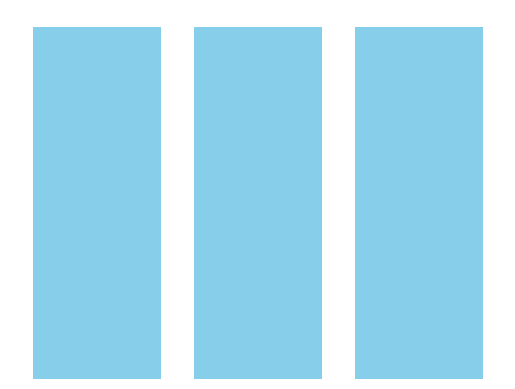

In [41]:
plt.bar(list(set(list(df.strength))),list(df_resampled.strength.value_counts()), color='skyblue')
plt.axis('off')
plt.show()

In [42]:
tokens = ''
for i in list(df.password):
    for j in i:
        if j not in tokens:
            tokens += j

print(tokens)

73ptilkaem5c0noy98ugs16wqz4rvjd2hxbf.TS-±MAYRBCDEÄOLIHJUNK(*)^#ZG PV_[Ù…XWF+;%$Q=&!Ú/<>Ð¤á?ÀºÇ]}³«÷ ·¢û@{|´°ÃõÂ—þÕß`¾ú~éÁ§É\ÅŸÓÞ¹¶™Ü›Ñ‹µœ¨ÏÒðåäï¯Êà¡Û²×í"Öæó¦Ôòöùñ¿¼


In [43]:
char_to_tok = {v:k for k,v in enumerate(sorted(list(tokens), key=lambda x: ord(x)))}
char_to_tok

{'\x01': 0,
 '\x02': 1,
 '\x04': 2,
 '\x05': 3,
 '\x06': 4,
 '\x0e': 5,
 '\x0f': 6,
 '\x10': 7,
 '\x11': 8,
 '\x12': 9,
 '\x13': 10,
 '\x16': 11,
 '\x17': 12,
 '\x18': 13,
 '\x1b': 14,
 '\x1c': 15,
 '\x1d': 16,
 '\x1e': 17,
 ' ': 18,
 '!': 19,
 '"': 20,
 '#': 21,
 '$': 22,
 '%': 23,
 '&': 24,
 '(': 25,
 ')': 26,
 '*': 27,
 '+': 28,
 '-': 29,
 '.': 30,
 '/': 31,
 '0': 32,
 '1': 33,
 '2': 34,
 '3': 35,
 '4': 36,
 '5': 37,
 '6': 38,
 '7': 39,
 '8': 40,
 '9': 41,
 ';': 42,
 '<': 43,
 '=': 44,
 '>': 45,
 '?': 46,
 '@': 47,
 'A': 48,
 'B': 49,
 'C': 50,
 'D': 51,
 'E': 52,
 'F': 53,
 'G': 54,
 'H': 55,
 'I': 56,
 'J': 57,
 'K': 58,
 'L': 59,
 'M': 60,
 'N': 61,
 'O': 62,
 'P': 63,
 'Q': 64,
 'R': 65,
 'S': 66,
 'T': 67,
 'U': 68,
 'V': 69,
 'W': 70,
 'X': 71,
 'Y': 72,
 'Z': 73,
 '[': 74,
 '\\': 75,
 ']': 76,
 '^': 77,
 '_': 78,
 '`': 79,
 'a': 80,
 'b': 81,
 'c': 82,
 'd': 83,
 'e': 84,
 'f': 85,
 'g': 86,
 'h': 87,
 'i': 88,
 'j': 89,
 'k': 90,
 'l': 91,
 'm': 92,
 'n': 93,
 'o': 94,
 'p':

In [44]:
df['max_len'] = df.password.apply(lambda x : len(x))

In [45]:
max(df.max_len)

220

In [46]:
df.loc[df.max_len == 147]

,password,strength,max_len
237921,n43sSh567hDjJ678Fj5D857I6j58SjJ876F89762k3liyU...,2,147


In [47]:
def preprocess(text):
    L = []
    for i in list(text):
        L.append(char_to_tok[i])
    for _ in range(len(L),220):
        L.append(-1)
    return L

In [48]:
df['X'] = df.password.apply(lambda x : preprocess(x))

In [49]:
len(df)

240000

In [50]:
df.head()

,password,strength,max_len,X
221611,73ptilp,0,7,"[39, 35, 95, 99, 88, 91, 95, -1, -1, -1, -1, -..."
594416,kalem55,0,7,"[90, 80, 91, 84, 92, 37, 37, -1, -1, -1, -1, -..."
221251,aca007,0,6,"[80, 82, 80, 32, 32, 39, -1, -1, -1, -1, -1, -..."
500448,nopy98u,0,7,"[93, 94, 95, 104, 41, 40, 100, -1, -1, -1, -1,..."
615462,ac7i5ge,0,7,"[80, 82, 39, 88, 37, 86, 84, -1, -1, -1, -1, -..."


In [51]:
xtrain,xtest,ytrain,ytest = train_test_split(
    df.X.values,
    df.strength,test_size=0.3
)
xtrain

array([list([92, 33, 34, 35, 35, 35, 35, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
       list([92, 94, 91, 82, 80, 89, 84, 99, 84, 33, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 

In [52]:
X_train_2d = np.stack(xtrain)
X_test_2d = np.stack(xtest)

In [53]:
X_train_2d,X_test_2d

(array([[ 92,  33,  34, ...,  -1,  -1,  -1],
        [ 92,  94,  91, ...,  -1,  -1,  -1],
        [ 33,  70,  38, ...,  -1,  -1,  -1],
        ...,
        [ 35,  91,  88, ...,  -1,  -1,  -1],
        [ 97,  96, 100, ...,  -1,  -1,  -1],
        [ 83,  84, 103, ...,  -1,  -1,  -1]]),
 array([[72, 84, 88, ..., -1, -1, -1],
        [92, 80, 99, ..., -1, -1, -1],
        [98, 87, 94, ..., -1, -1, -1],
        ...,
        [81, 80, 98, ..., -1, -1, -1],
        [41, 98, 33, ..., -1, -1, -1],
        [81, 80, 86, ..., -1, -1, -1]]))

In [54]:
d_model = DecisionTreeClassifier()

In [55]:
d_model.fit(X_train_2d,ytrain)

DecisionTreeClassifier()

In [56]:
y_pred = d_model.predict(X_test_2d)

In [57]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24053
           1       1.00      1.00      1.00     24015
           2       1.00      1.00      1.00     23932

    accuracy                           1.00     72000
   macro avg       1.00      1.00      1.00     72000
weighted avg       1.00      1.00      1.00     72000



In [58]:
knn = KNeighborsClassifier(n_neighbors=3)

In [59]:
knn.fit(X_train_2d,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [60]:
y_pred = d_model.predict(X_test_2d)

In [61]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24053
           1       1.00      1.00      1.00     24015
           2       1.00      1.00      1.00     23932

    accuracy                           1.00     72000
   macro avg       1.00      1.00      1.00     72000
weighted avg       1.00      1.00      1.00     72000



In [62]:
rf = RandomForestClassifier()

In [63]:
rf.fit(X_train_2d,ytrain)

RandomForestClassifier()

In [64]:
y_pred = rf.predict(X_test_2d)

In [65]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24053
           1       1.00      1.00      1.00     24015
           2       1.00      1.00      1.00     23932

    accuracy                           1.00     72000
   macro avg       1.00      1.00      1.00     72000
weighted avg       1.00      1.00      1.00     72000



In [66]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_2d)
X_test = scaler.fit_transform(X_test_2d)

In [67]:
clf = MultinomialNB()
clf.fit(X_train,ytrain)

MultinomialNB()

In [68]:
y_pred = clf.predict(X_test)

In [69]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24053
           1       1.00      0.96      0.98     24015
           2       0.96      1.00      0.98     23932

    accuracy                           0.99     72000
   macro avg       0.99      0.99      0.99     72000
weighted avg       0.99      0.99      0.99     72000



In [70]:
label = {
    0:'weak',
    1:'medium',
    2:'hard'
}

In [71]:
def prediction(model,data):
    input = [data]
    pred = model.predict(input)
    return label[pred.item()]

In [72]:
password = random.sample(list(tokens),k=8)
password = ''.join(password)
print(password)
encoded = preprocess(password)

?*5ÚÞäl


In [73]:
prediction(model=d_model,data=encoded)

'medium'

In [74]:
password = 'amith1234'
password = ''.join(password)
print(password)
encoded = preprocess(password)

amith1234


In [75]:
prediction(model=d_model,data=encoded)

'medium'

In [76]:
def ensemble(data):
    L = []
    input = [data]
    pred = d_model.predict(input)
    L.append(pred.item())
    pred = knn.predict(input)
    L.append(pred.item())
    pred = rf.predict(input)
    L.append(pred.item())
    pred = clf.predict(input)
    L.append(pred.item())
    return L
    
    

In [79]:
password = random.sample(list(tokens),k=20)
password = ''.join(password)
print(password)
encoded = preprocess(password)

g¯é#lx%<r°"…5Ï¢dä0


In [80]:
result = max((Counter([x]) for x in ensemble(encoded)), key=lambda x: x.most_common(1)[0][1])

# Extract the most common element and its count
most_common, count = result.most_common(1)[0]
print(label[most_common])

hard
